# VANNA AI Demo with NASA Oct 22-23 IT Spend Data (from Sam.gov)

Here we experiment with LLM generation of SQL through the open source VANNA project (vanna.ai).

We begin with a real world problem: Tracking the IT Spend of government agencies. Specifically, there are two code systems in use, NAICS and PSC. So here we will use Vanna to compare IT spending according to NAICS codes and PSC codes by NASA from October 2022 to 2023.

Specifically, IT spending according to NAICS codes begins with "54", while for PSC codes begins with "D". So we pulled the data for NASA from Sam.gov twice, once for NAICS codes that begin with "54" and once for PSC codes that begin with "D". We will then use Vanna to look at the overlap and differences in the data.

## First let's import the CSV files into a local sqlite database

In [1]:
import csv
import sqlite3

# Connect to a local file
connection = sqlite3.connect('nasa_spend_10_22_23.db')
cursor = connection.cursor()

In [2]:
# Create the NASA NAICS IT SPEND table
cursor.execute('''
CREATE TABLE nasa_naics_it_spend(
 id INTEGER PRIMARY KEY AUTOINCREMENT,
 contracting_depratment_id TEXT,
 contracting_department_name TEXT,
 contracting_office_id TEXT,
 contracting_office_name TEXT,
 naics_code TEXT,
 naics_description TEXT,
 psc_code TEXT,
 psc_description TEXT,
 description_of_requirement TEXT,
 ultimate_parent_legal_business_name TEXT,
 ultimate_parent_unique_entity_id TEXT,
 dollars_obligated REAL);
''')

In [3]:
# open the NAICS IT SPEND CSV file
file = open('NASA_NAICS_IT_SPEND_Oct_22_to_23.csv')
contents = csv.reader(file)
next(contents, None) # skip the header
insert_records = '''INSERT INTO nasa_naics_it_spend (contracting_depratment_id, contracting_department_name, 
 contracting_office_id, contracting_office_name, naics_code, naics_description, psc_code, psc_description,
 description_of_requirement, ultimate_parent_legal_business_name, ultimate_parent_unique_entity_id,
 dollars_obligated) values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
'''
cursor.executemany(insert_records,contents)

In [4]:
# Test by summing up all expenses
rows = cursor.execute("select sum(dollars_obligated) from nasa_naics_it_spend").fetchall()
rows

[(1054609028.0799993,)]

In [5]:
# Create the NASA PSC IT SPEND table
cursor.execute('''
CREATE TABLE nasa_psc_it_spend(
 id INTEGER PRIMARY KEY AUTOINCREMENT,
 contracting_depratment_id TEXT,
 contracting_department_name TEXT,
 contracting_office_id TEXT,
 contracting_office_name TEXT,
 naics_code TEXT,
 naics_description TEXT,
 psc_code TEXT,
 psc_description TEXT,
 description_of_requirement TEXT,
 ultimate_parent_legal_business_name TEXT,
 ultimate_parent_unique_entity_id TEXT,
 dollars_obligated REAL);
''')

In [6]:
# open the PSC IT SPEND CSV file
file = open('NASA_PSC_IT_SPEND_Oct_22_to_23.csv')
contents = csv.reader(file)
next(contents, None) # skip the header
insert_records = '''INSERT INTO nasa_psc_it_spend (contracting_depratment_id, contracting_department_name, 
 contracting_office_id, contracting_office_name, naics_code, naics_description, psc_code, psc_description,
 description_of_requirement, ultimate_parent_legal_business_name, ultimate_parent_unique_entity_id,
 dollars_obligated) values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
'''
cursor.executemany(insert_records,contents)

In [7]:
# Test by summing up all expenses
rows = cursor.execute("select sum(dollars_obligated) from nasa_psc_it_spend").fetchall()
rows

[(1119386991.0599995,)]

In [8]:
connection.commit()
connection.close()

# So now we have a database. Let's connect to Vanna and teach it about our system

In [21]:
from vanna.remote import VannaDefault
import os

vanna_api_key = os.getenv("VANNA_API_KEY")
# NOTE: nasa_budget needed to be made on the vanna website
vn = VannaDefault(model='nasa_budget', api_key=vanna_api_key)
vn.connect_to_sqlite('nasa_spend_10_22_23.db')

In [30]:
vn.train(ddl="""CREATE TABLE nasa_naics_it_spend(
 id INTEGER PRIMARY KEY AUTOINCREMENT,
 contracting_depratment_id TEXT,
 contracting_department_name TEXT,
 contracting_office_id TEXT,
 contracting_office_name TEXT,
 naics_code TEXT,
 naics_description TEXT,
 psc_code TEXT,
 psc_description TEXT,
 description_of_requirement TEXT,
 ultimate_parent_legal_business_name TEXT,
 ultimate_parent_unique_entity_id TEXT,
 dollars_obligated REAL);""")

vn.train(documentation="""The nasa_naics_it_spend table contains NASA's IT spending data for
NAICS codes that are IT categories. The budget data is from October 2022 through October 2023
and pulled from sam.gov.""")

vn.train(ddl="""CREATE TABLE nasa_psc_it_spend(
 id INTEGER PRIMARY KEY AUTOINCREMENT,
 contracting_depratment_id TEXT,
 contracting_department_name TEXT,
 contracting_office_id TEXT,
 contracting_office_name TEXT,
 naics_code TEXT,
 naics_description TEXT,
 psc_code TEXT,
 psc_description TEXT,
 description_of_requirement TEXT,
 ultimate_parent_legal_business_name TEXT,
 ultimate_parent_unique_entity_id TEXT,
 dollars_obligated REAL);""")

vn.train(documentation="""The nasa_psc_it_spend table contains NASA's IT spending data for
PSC codes that are IT categories. The budget data is from October 2022 through October 2023
and pulled from sam.gov.""")

Adding ddl: CREATE TABLE nasa_naics_it_spend(
 id INTEGER PRIMARY KEY AUTOINCREMENT,
 contracting_depratment_id TEXT,
 contracting_department_name TEXT,
 contracting_office_id TEXT,
 contracting_office_name TEXT,
 naics_code TEXT,
 naics_description TEXT,
 psc_code TEXT,
 psc_description TEXT,
 description_of_requirement TEXT,
 ultimate_parent_legal_business_name TEXT,
 ultimate_parent_unique_entity_id TEXT,
 dollars_obligated REAL);
Adding documentation....
Adding ddl: CREATE TABLE nasa_psc_it_spend(
 id INTEGER PRIMARY KEY AUTOINCREMENT,
 contracting_depratment_id TEXT,
 contracting_department_name TEXT,
 contracting_office_id TEXT,
 contracting_office_name TEXT,
 naics_code TEXT,
 naics_description TEXT,
 psc_code TEXT,
 psc_description TEXT,
 description_of_requirement TEXT,
 ultimate_parent_legal_business_name TEXT,
 ultimate_parent_unique_entity_id TEXT,
 dollars_obligated REAL);
Adding documentation....


'89707-doc'

In [ ]:
vn.train(documentation="""The nasa_naics_it_spend table is NASA budgetary spending according to NAICS IT codes
while the nasa_psc_it_spend table is PSC IT codes.""")

In [31]:
# Get training data for review
# You can remove training data with rn.remove_training_data(id='1-ddl')
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,29811-ddl,ddl,NaN,CREATE TABLE nasa_naics_it_spend(\n id INTEGER...
1,89707-doc,documentation,NaN,The nasa_psc_it_spend table contains NASA's IT...
2,89706-doc,documentation,NaN,The nasa_naics_it_spend table contains NASA's ...
3,29812-ddl,ddl,NaN,CREATE TABLE nasa_psc_it_spend(\n id INTEGER P...


# Now let's reconnect and try some queries

In [10]:
from vanna.remote import VannaDefault
import os

vanna_api_key = os.getenv("VANNA_API_KEY")
# NOTE: nasa_budget needed to be made on the vanna website
vn = VannaDefault(model='nasa_budget', api_key=vanna_api_key)
vn.connect_to_sqlite('nasa_spend_10_22_23.db')

SELECT SUM(dollars_obligated) AS total_obligated_spending
FROM nasa_naics_it_spend;
   total_obligated_spending
0              1.054609e+09


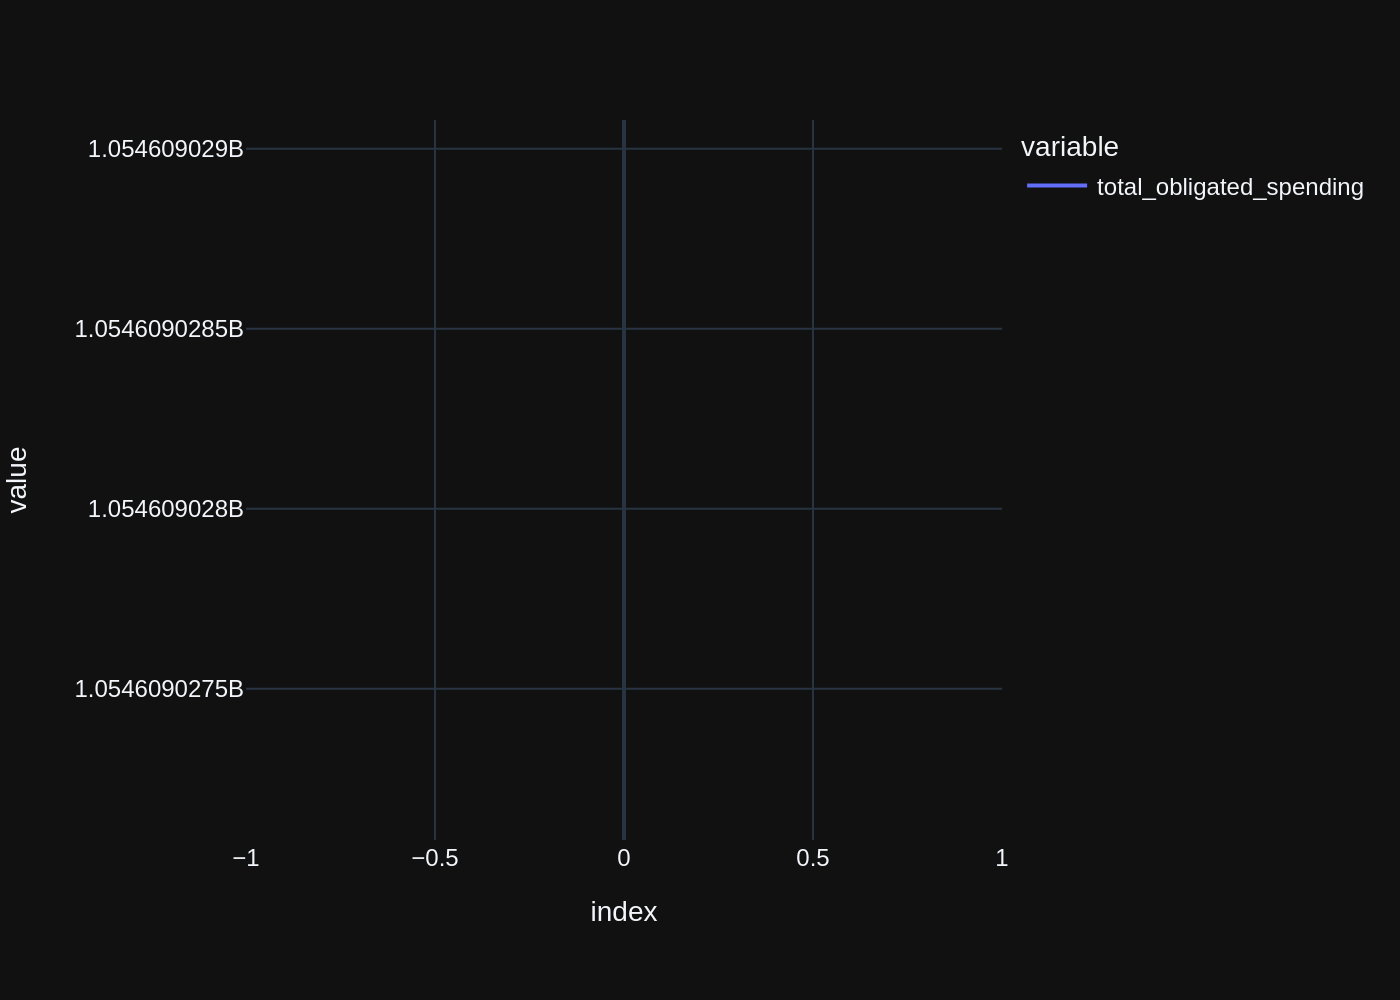

In [11]:
# Now let's try it out!
vn.ask('What is the sum of all obligated spending where the NAICS codes are IT categories?')

In [12]:
# Sanity check
import sqlite3
connection = sqlite3.connect('nasa_spend_10_22_23.db')
cursor = connection.cursor()
rows = cursor.execute("select sum(dollars_obligated) from nasa_naics_it_spend").fetchall()
connection.close()
rows

[(1054609028.0799993,)]

SELECT psc_code, SUM(dollars_obligated) AS total_obligated_dollars
FROM nasa_naics_it_spend
GROUP BY psc_code
ORDER BY total_obligated_dollars DESC
LIMIT 10;
  psc_code  total_obligated_dollars
0     DF10             2.535656e+08
1     D301             1.551864e+08
2     DA10             1.179725e+08
3     DA01             1.020970e+08
4     R425             8.089933e+07
5     DB01             5.275513e+07
6     DJ01             5.004882e+07
7     AD26             3.656441e+07
8     7035             2.931178e+07
9     DG10             2.365996e+07


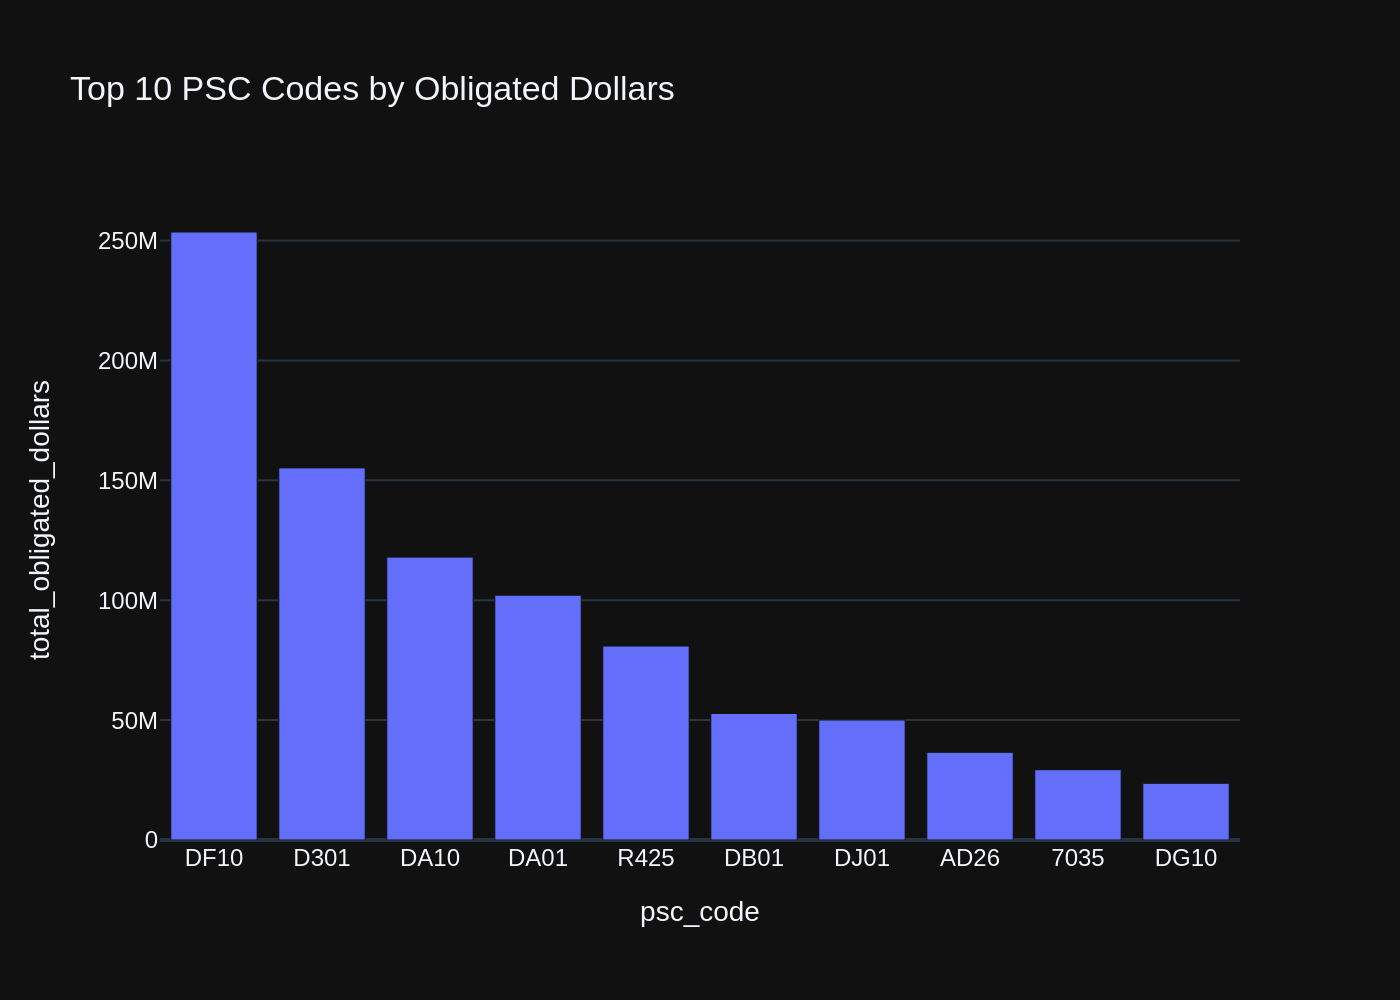

In [14]:
vn.ask('What are the top 10 PSC codes by obligated dollars where the NAICS codes are IT categories?')

SELECT naics_code, SUM(dollars_obligated) AS total_obligated_dollars
FROM nasa_psc_it_spend
GROUP BY naics_code
ORDER BY total_obligated_dollars DESC
LIMIT 10;
  naics_code  total_obligated_dollars
0     541512             5.147609e+08
1     541519             2.484600e+08
2     517919             1.861355e+08
3     541513             6.479180e+07
4     518210             3.512574e+07
5     511210             2.017307e+07
6     517110             1.317207e+07
7     541511             1.022058e+07
8     513210             7.718493e+06
9     541330             6.808794e+06


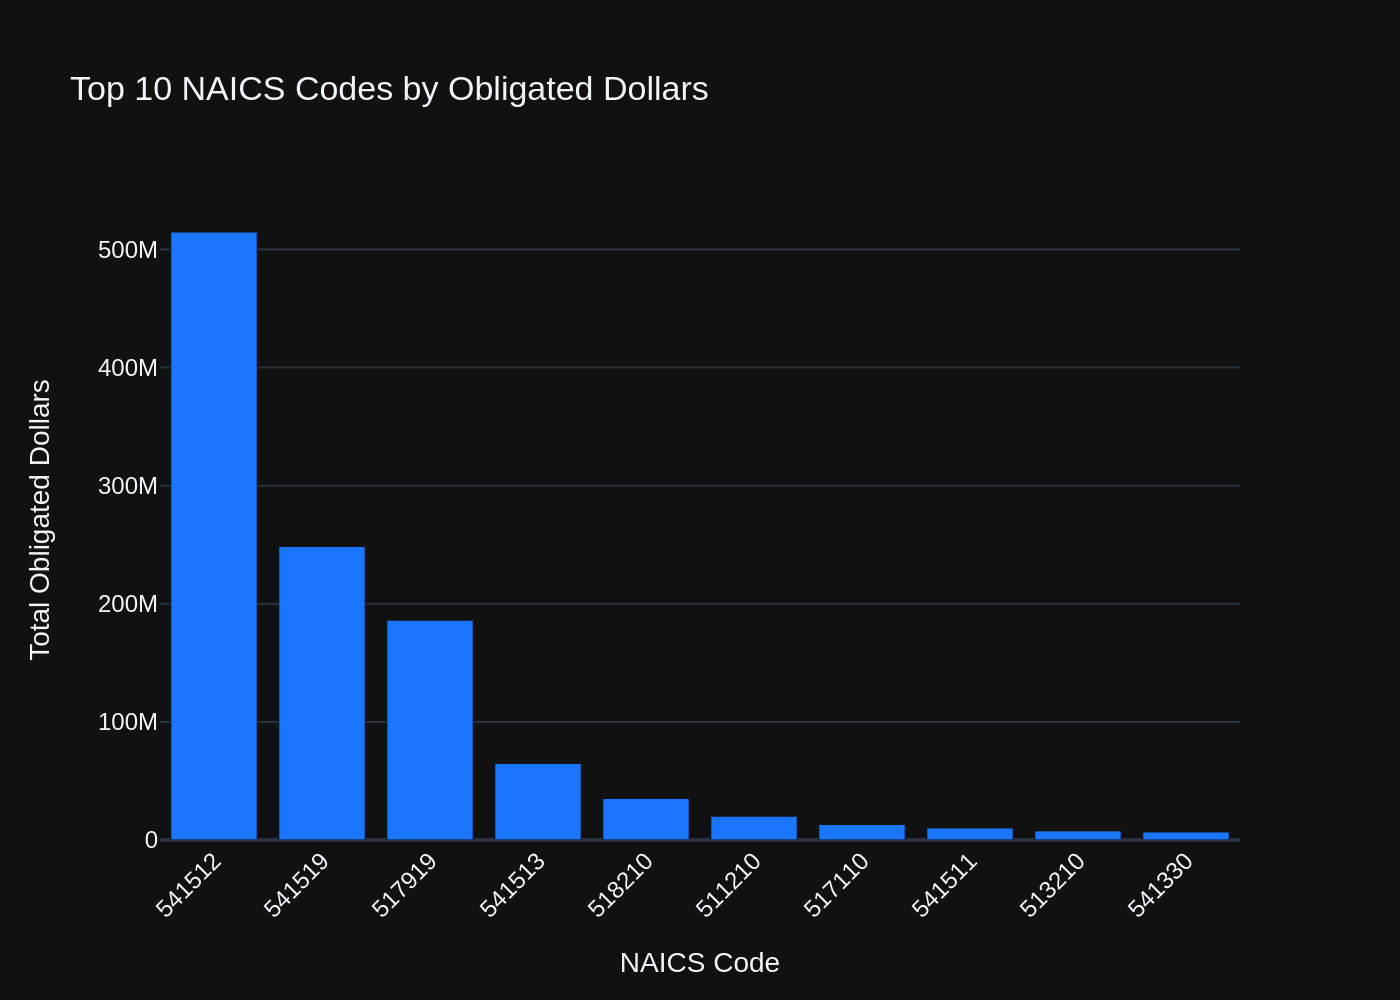

In [15]:
vn.ask('What are the top 10 NAICS codes by obligated dollars where the PSC codes are IT categories?')

SELECT naics_code, SUM(dollars_obligated) AS total_obligated_dollars
FROM nasa_psc_it_spend
WHERE naics_code NOT IN (
  SELECT naics_code
  FROM nasa_naics_it_spend
)
GROUP BY naics_code
ORDER BY total_obligated_dollars DESC
LIMIT 10;
  naics_code  total_obligated_dollars
0     517919             1.861355e+08
1     518210             3.512574e+07
2     511210             2.017307e+07
3     517110             1.317207e+07
4     513210             7.718493e+06
5     541330             6.808794e+06
6     334111             3.420314e+06
7     541690             1.363264e+06
8     541712             1.238779e+06
9     541715             8.076310e+05


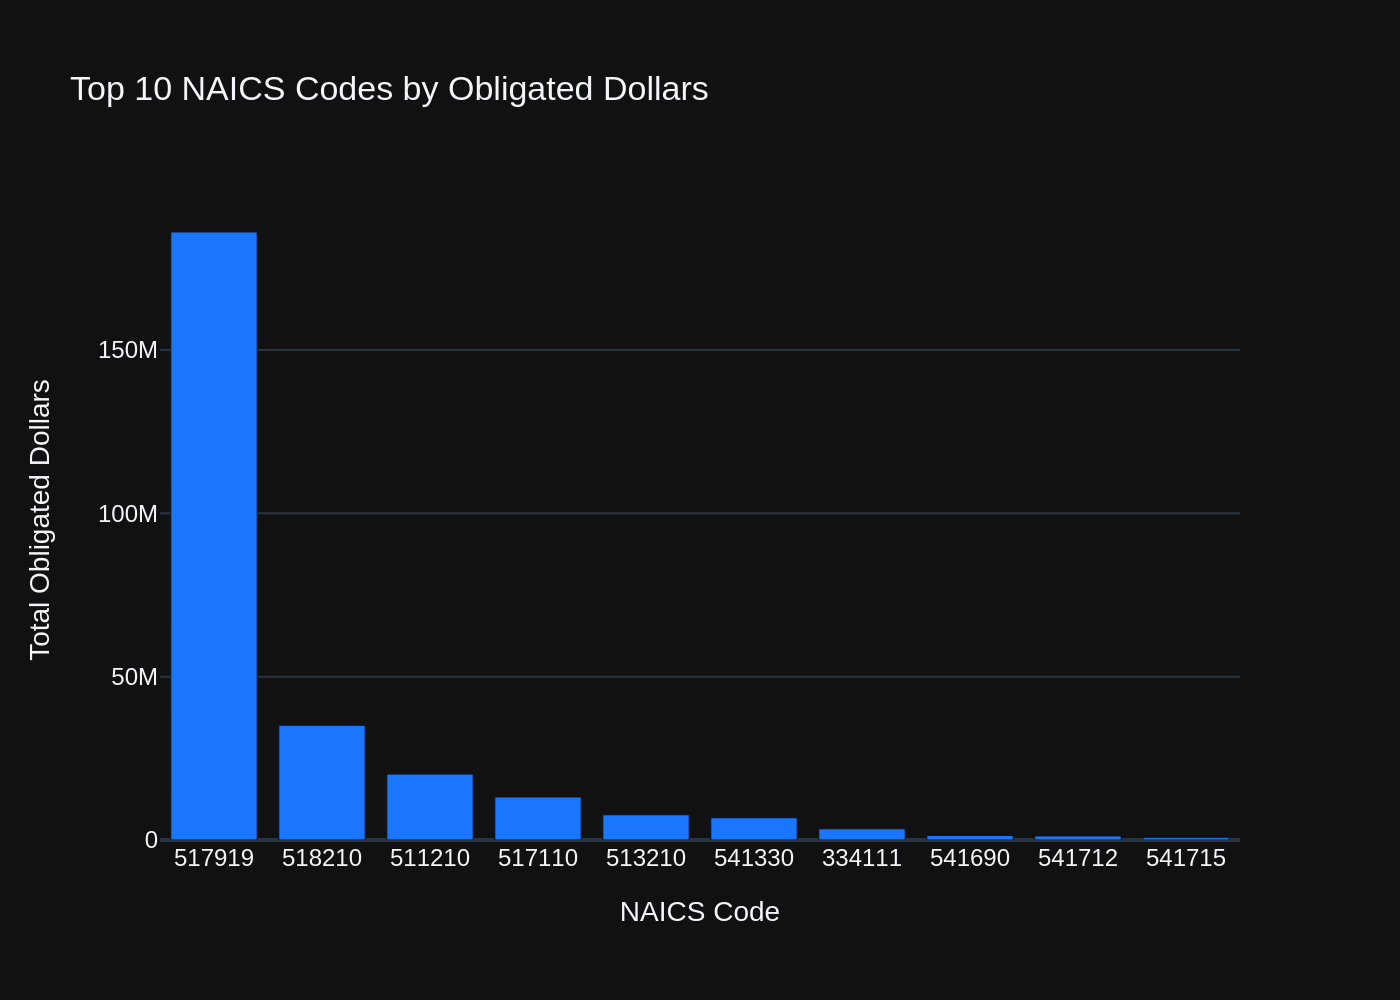

In [19]:
vn.ask('What are the top 10 NAICS codes by obligated dollars that are in the PSC IT category report but are not in the NAICS IT category report?')

SELECT psc_code, SUM(dollars_obligated) AS total_obligated_dollars
FROM nasa_naics_it_spend
WHERE psc_code NOT IN (
  SELECT psc_code
  FROM nasa_psc_it_spend
)
GROUP BY psc_code
ORDER BY total_obligated_dollars DESC
LIMIT 10;
  psc_code  total_obligated_dollars
0     R425              80899330.14
1     AD26              36564407.79
2     7035              29311778.42
3     M1BG              12351081.92
4     7K20               7949048.88
5     R499               7353681.60
6     7B22               5426146.21
7     7B20               5016256.65
8     7E20               4022520.78
9     AJ14               3554179.00


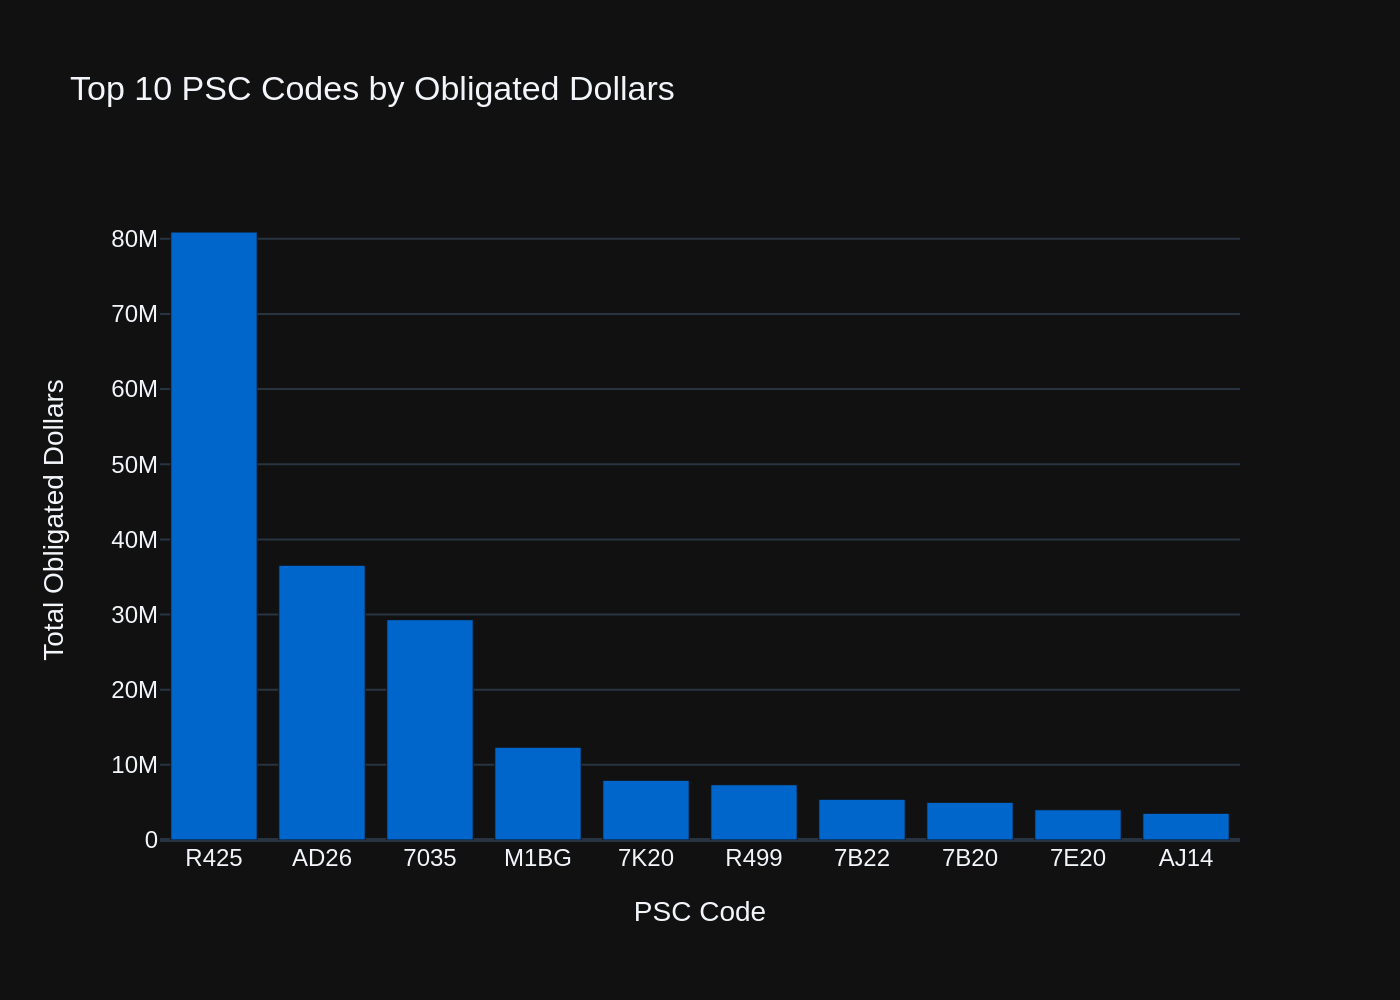

In [20]:
vn.ask('What are the top 10 PSC codes by obligated dollars that are in the NAICS IT category report but are not in the PSC IT category report?')